<a href="https://colab.research.google.com/github/eugeneegbe/PDP_And_ICE/blob/main/PDP_and_ICE_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
from sklearn.inspection import PartialDependenceDisplay
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split

drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Paderborn University/XAI/Exercise-2/bike.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,temp,atemp,hum,windspeed,casual,registered,cnt,workday,weather,days_since_2011,cnt_2d_bfr
0,3,2011-01-03,WINTER,2011,JAN,N,MON,1.229108,22.439770,43.7273,16.636703,120,1229,1349,Y,GOOD,2,985
1,4,2011-01-04,WINTER,2011,JAN,N,TUE,1.400000,23.212148,59.0435,10.739832,108,1454,1562,Y,GOOD,3,801
2,5,2011-01-05,WINTER,2011,JAN,N,WED,2.666979,23.795180,43.6957,12.522300,82,1518,1600,Y,GOOD,4,1349
3,6,2011-01-06,WINTER,2011,JAN,N,THU,1.604356,23.929106,51.8261,6.000868,88,1518,1606,Y,GOOD,5,1562
4,7,2011-01-07,WINTER,2011,JAN,N,FRI,1.236534,23.100526,49.8696,11.304642,148,1362,1510,Y,MISTY,6,1600


In [4]:
drop_columns = ['instant', 'dteday', 'mnth', 'yr', 'season', 'holiday',
                'atemp', 'casual', 'registered', 'weather',
                'days_since_2011', 'workday', 'weekday']

df['workdayY'] = np.where(df['workday'] == 'Y', 1, 0)
df['weatherMISTY'] = np.where(df['weather'] == 'MISTY', 1, 0)
df['weatherBAD'] =  df['weather'].apply(lambda x: 1 if x == 'BAD' else 0)
df['seasonSUMMER'] = np.where(df['season'] == 'SUMMER', 1, 0)
df['seasonSPRING'] = np.where(df['season'] == 'SPRING', 1, 0)
df['seasonFALL'] = np.where(df['season'] == 'FALL', 1, 0)
df['holidayY'] = np.where(df['holiday'] == 'Y', 1, 0)

df = df.drop(drop_columns, axis=1)
df


,temp,hum,windspeed,cnt,cnt_2d_bfr,workdayY,weatherMISTY,weatherBAD,seasonSUMMER,seasonSPRING,seasonFALL,holidayY
0,1.229108,43.7273,16.636703,1349,985,1,0,0,0,0,0,0
1,1.400000,59.0435,10.739832,1562,801,1,0,0,0,0,0,0
2,2.666979,43.6957,12.522300,1600,1349,1,0,0,0,0,0,0
3,1.604356,51.8261,6.000868,1606,1562,1,0,0,0,0,0,0
4,1.236534,49.8696,11.304642,1510,1600,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
723,3.945849,65.2917,23.458911,2114,1013,1,1,0,0,0,0,0
724,3.906651,59.0000,10.416557,3095,441,1,1,0,0,0,0,0
725,3.906651,75.2917,8.333661,1341,2114,0,1,0,0,0,0,0
726,4.024151,48.3333,23.500518,1796,3095,0,0,0,0,0,0,0


In [5]:
target = df.pop('cnt')

x_train, x_test, y_train, y_test = train_test_split(df, target, test_size = 0.2, random_state = 42)


In [6]:
# Initializing the Random Forest Regression model with 10 decision trees
model = RandomForestRegressor(n_estimators = 100, random_state = 42)

# Fitting the Random Forest Regression model to the data
model.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [7]:
y_pred = model.predict(x_test)

# RMSE (Root Mean Square Error)
rmse = float(format(np.sqrt(mean_squared_error(y_test, y_pred)), '.3f'))
print("\nRMSE: ", rmse)


RMSE:  845.179


# Partial dependence plots

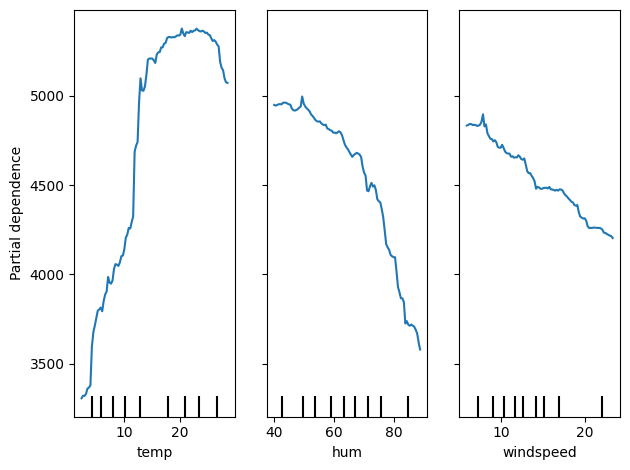

In [8]:
plot_features = ['temp', 'hum', 'windspeed']

PartialDependenceDisplay.from_estimator(model, x_test, features=plot_features)
plt.tight_layout()
plt.show()

In [9]:
feature_result = permutation_importance(model, x_test, y_test, n_repeats=30, random_state=42, n_jobs=2)

importance_df = pd.DataFrame({
  'feature': x_test.columns,
  'importance_mean': feature_result.importances_mean,
  'importance_std': feature_result.importances_std
})

print(importance_df)

         feature  importance_mean  importance_std
0           temp         0.286428        0.035155
1            hum         0.160302        0.031375
2      windspeed         0.037111        0.009804
3     cnt_2d_bfr         0.570530        0.059170
4       workdayY         0.010073        0.003668
5   weatherMISTY         0.006353        0.001841
6     weatherBAD         0.006784        0.001637
7   seasonSUMMER         0.000213        0.000707
8   seasonSPRING         0.006179        0.002362
9     seasonFALL         0.008640        0.004219
10      holidayY         0.000014        0.000741


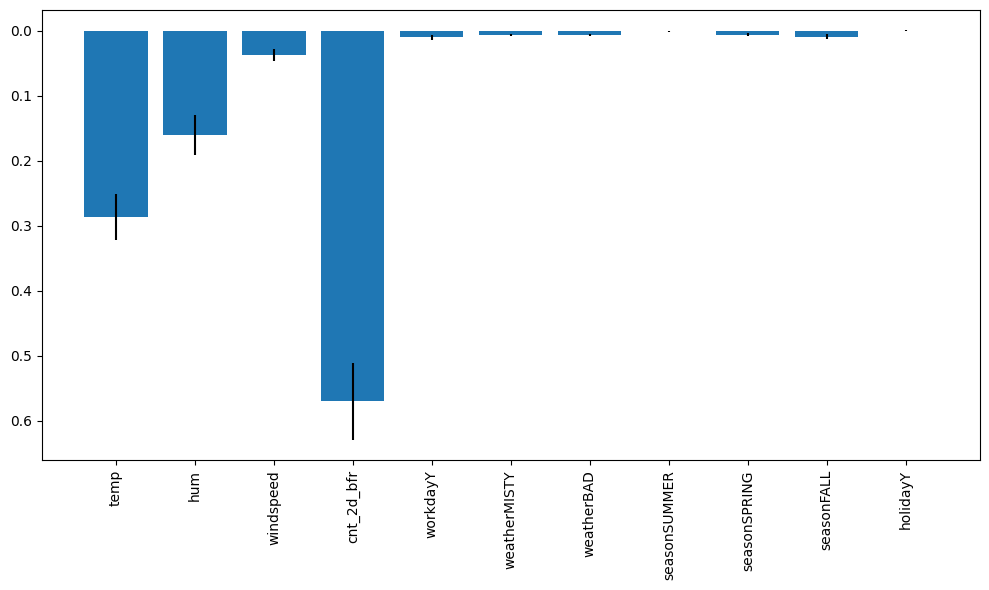

In [10]:
plt.figure(figsize=(10, 6))
plt.bar(x=importance_df['feature'], height=importance_df['importance_mean'], yerr=importance_df['importance_std'], align='center')
plt.xticks(rotation=90)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Manual Calculation of Permutation importance
Permutation importance is a quantifier showing how much a mod
el's performance drops when the values of a single feature are randomnly shuffled.

**PI(f) = M(f) - Mp(f):**

where :
- **M(f)** is the model performance before permutation,
- **Mp(f)** is model performance after permutation


In [11]:
import warnings
warnings.filterwarnings(action='once')

# computing permutation
computed_importances = {}

# baseline rscore, residual sum of squares and total sum of squares
# ss_res = measures difference in expected and actual predictions
# ss_total = measure how far our values are from the mean


X = df.copy()

y_pred_baseline = model.predict(x_test)
ss_res = np.sum((y_test - y_pred_baseline) ** 2)
ss_tot = np.sum((y_test - np.mean(y_test)) ** 2)
baseline_r2 = 1 - (ss_res / ss_tot)

n_repeats = 10
results = {feature: [] for feature in df.columns}

feature_names = X.columns
x_test_np = x_test.to_numpy()


for i, feature in enumerate(feature_names):
  for _ in range(n_repeats):
    X_permutted = x_test_np.copy()
    X_permutted[:, i] = np.random.permutation(X_permutted[:, i])

    # Make a prediction and calculate the R2 for permutation
    y_pred_permutted = model.predict(X_permutted)
    ss_res_pem = np.sum((y_test - y_pred_permutted) ** 2)
    r2_pem = 1 - (ss_res_pem / ss_tot)

    results[feature].append(baseline_r2 - r2_pem)

# Create a dataframe of computed features
perm_importance_summary = pd.DataFrame({
    'feature': list(results.keys()),
    'importance_mean': [np.mean(vals) for vals in results.values()],
    'importance_std': [np.std(vals) for vals in results.values()]
})

print(perm_importance_summary)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/

         feature  importance_mean  importance_std
0           temp         0.294025        0.028738
1            hum         0.149154        0.035882
2      windspeed         0.037589        0.008732
3     cnt_2d_bfr         0.559372        0.065935
4       workdayY         0.012405        0.003176
5   weatherMISTY         0.004735        0.001559
6     weatherBAD         0.007239        0.001616
7   seasonSUMMER         0.000045        0.000722
8   seasonSPRING         0.005578        0.002742
9     seasonFALL         0.008141        0.002997
10      holidayY        -0.000055        0.000358


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/

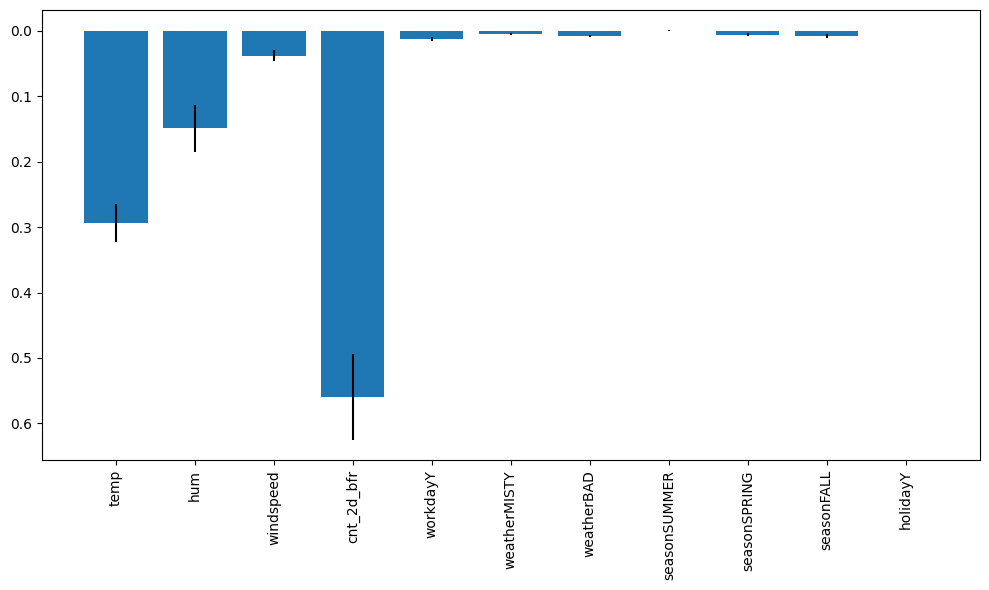

In [12]:
plt.figure(figsize=(10, 6))
plt.bar(x=perm_importance_summary['feature'], height=perm_importance_summary['importance_mean'], yerr=perm_importance_summary['importance_std'], align='center')
plt.xticks(rotation=90)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Creating PDPs manually with given specifications


3. y = 1 * group_sign( 1 or -1 randomly per sample)

# C) Triangle-shaped PDP

**y = 1 - abs(x)**

PDP is symetric, increasing for x1 < 0 and decreasing otherwise

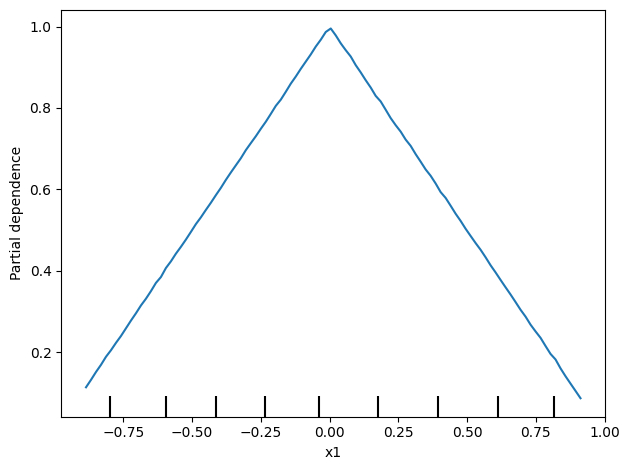

In [13]:
np.random.seed(0)
n = 1000
x1 = np.random.uniform(-1, 1, size=n)
x2 = np.random.normal(0, 1, size=n)


# Peak at 0 and drop on both sides
y = 1 - np.abs(x1)

df_sample_triangle = pd.DataFrame({'x1': x1})
model.fit(df_sample_triangle, y)

PartialDependenceDisplay.from_estimator(model, df_sample_triangle, ['x1'])
plt.tight_layout()
plt.show()

# d) High permutation importance

**y = x1 * x2**

PDP of x1 is flat because its **marginal effect** is zero on average

In this case, permutation may break the interaction reducing performance

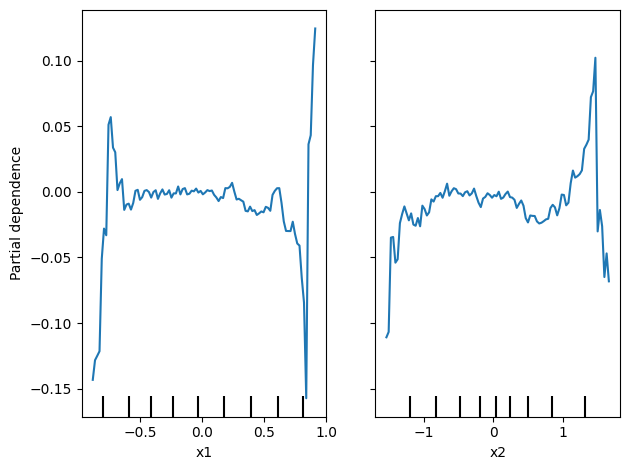

In [18]:
y = x1 * x2

df_sample_triangle = pd.DataFrame({
    'x1': x1,
    'x2': x2,
    })
model.fit(df_sample_triangle, y)

PartialDependenceDisplay.from_estimator(model, df_sample_triangle, ['x1', 'x2'])
plt.tight_layout()
plt.show()

# e) Constant PDP with divergence

**y = x1 * alternate_sign(-1, 1)**

In this case, the effect cancels out, meaning the PDP results to flat similarly as above

Individual values of the feature here has opposite responses (**diverge from zero**)


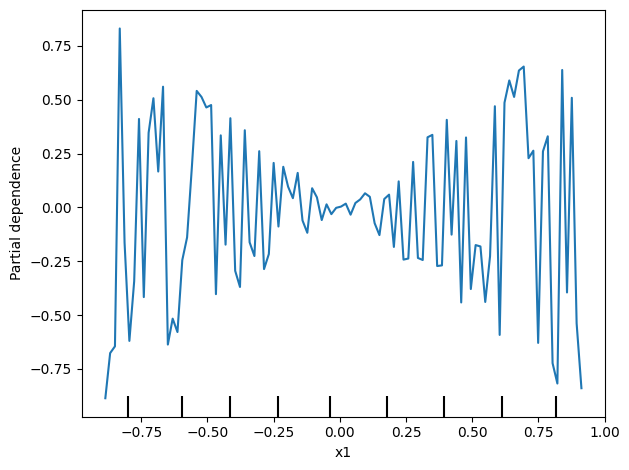

<frozen importlib._bootstrap>:1047: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:1047: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()


In [20]:
alt_sign_choice = np.random.choice([-1, 1], size=n)
y = x1 * alt_sign_choice

df_sample_triangle = pd.DataFrame({
    'x1': x1
    })
model.fit(df_sample_triangle, y)

PartialDependenceDisplay.from_estimator(model, df_sample_triangle, ['x1'])
plt.tight_layout()
plt.show()